In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
# nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# important libraries
from bokeh.plotting import figure
from bokeh.io import output_file, show, output_notebook
from collections import Counter
import spacy
from spacy.util import compounding
from spacy.util import minibatch
from spacy import displacy
import gc
import os
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
sns.set(rc={'figure.figsize': (20,10)})

In [5]:
#Read the data as a dataframe
df = pd.read_excel('/content/tweets1.xlsx')

In [6]:
df.isna().sum().sort_values(ascending=False)

Tweet_Language                1496
User _Id                         0
User_Following                   0
User_Followers                   0
Profile_URL                      0
Verified_or_Non-Verified         0
User_Bio                         0
Username                         0
Name                             0
Tweet_Id                         0
Tweet_URL                        0
Tweet_Location                   0
Likes_Received                   0
Retweets_Received                0
Client                           0
Tweet_Type                       0
Tweet_Content                    0
Tweet_Posted_Time                0
User_Accoun_ Creation_Date       0
dtype: int64

In [7]:
na_df = df[df.Tweet_Language.isna()]
na_df[['Tweet_Language','Tweet_Content']].head()

,Tweet_Language,Tweet_Content
409,NaN,"""मेरी Sexiest WEBSERIES 👙""हाय गर्मी""👙\nअब आप भ..."
485,NaN,"""🇲🇦 x 🇫🇷 #FRAMAR #FIFAWorldCup https://t.co/Z5..."
491,NaN,"""मेरी Sexiest WEBSERIES 👙""हाय गर्मी""👙\nअब आप भ..."
692,NaN,"""YESSSSSSSSS !!!!!!!!! 🇫🇷🇫🇷🇫🇷🇫🇷🇫🇷 #FIFAWorldCu..."
703,NaN,"""🇲🇦 x 🇫🇷 #FRAMAR #FIFAWorldCup https://t.co/Z5..."


In [8]:
# replacing na values in college with No college
df["Tweet_Language"].fillna("Mixture", inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Tweet_Id                    50000 non-null  object
 1   Tweet_URL                   50000 non-null  object
 2   Tweet_Posted_Time           50000 non-null  object
 3   Tweet_Content               50000 non-null  object
 4   Tweet_Type                  50000 non-null  object
 5   Client                      50000 non-null  object
 6   Retweets_Received           50000 non-null  int64 
 7   Likes_Received              50000 non-null  int64 
 8   Tweet_Location              50000 non-null  object
 9   Tweet_Language              50000 non-null  object
 10  User _Id                    50000 non-null  object
 11  Name                        50000 non-null  object
 12  Username                    50000 non-null  object
 13  User_Bio                    50000 non-null  ob

In [10]:
df.isna().sum().sort_values(ascending=False)

Tweet_Id                      0
User _Id                      0
User_Following                0
User_Followers                0
Profile_URL                   0
Verified_or_Non-Verified      0
User_Bio                      0
Username                      0
Name                          0
Tweet_Language                0
Tweet_URL                     0
Tweet_Location                0
Likes_Received                0
Retweets_Received             0
Client                        0
Tweet_Type                    0
Tweet_Content                 0
Tweet_Posted_Time             0
User_Accoun_ Creation_Date    0
dtype: int64

<Axes: xlabel='count', ylabel='Tweet_Language'>

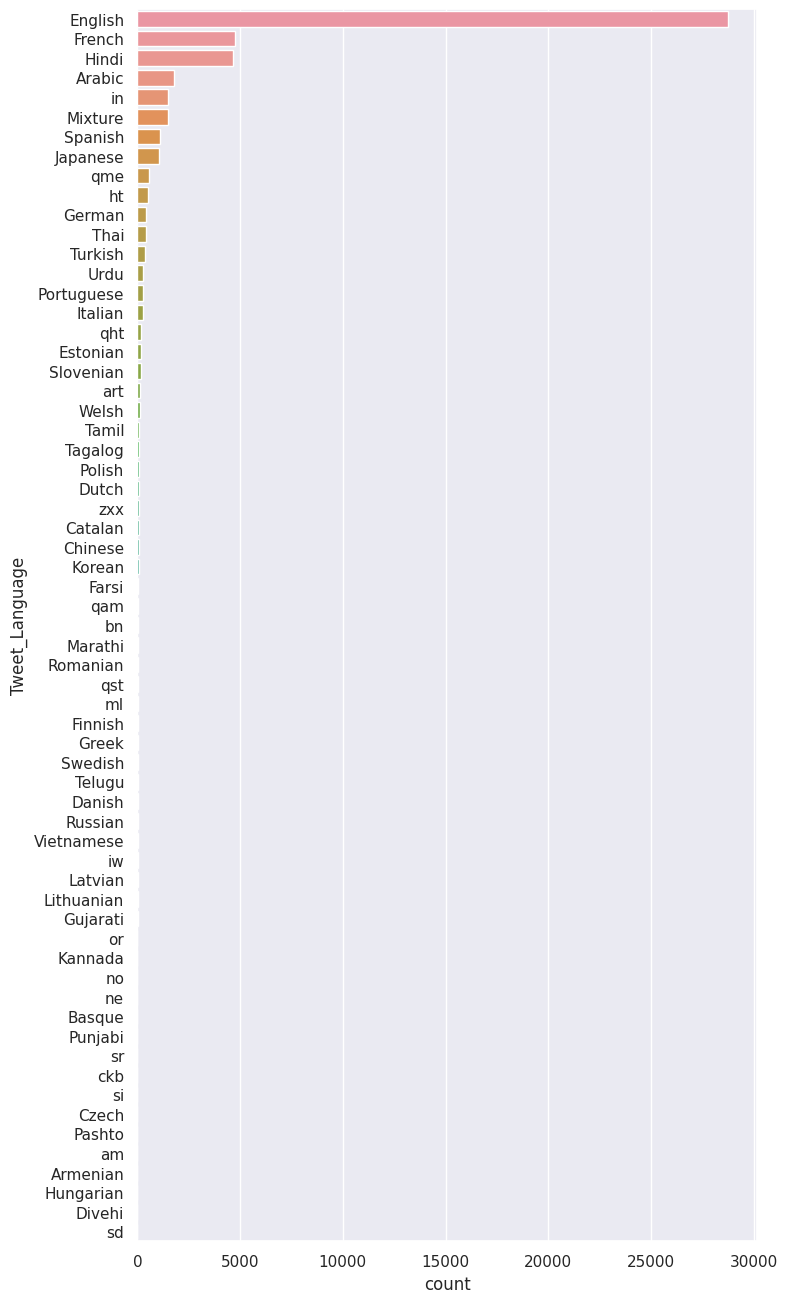

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig, ax = plt.subplots(figsize=(8,16))
order = df['Tweet_Language'].value_counts().index
sns.countplot(df, y="Tweet_Language", ax=ax, orient='h', order=order)

In [12]:
total_samples = df.shape[0]
n_en_samples = df.Tweet_Language.value_counts()['English']
print(f'There are {n_en_samples} samples in English, which corresponds to {(n_en_samples/total_samples)*100:.2f}% of all data')

There are 28745 samples in English, which corresponds to 57.49% of all data


In [13]:
total_samples = df.shape[0]
n_ar_samples = df.Tweet_Language.value_counts()['Arabic']
print(f'There are {n_ar_samples} samples in Arabic, which corresponds to {(n_ar_samples/total_samples)*100:.2f}% of all data')

There are 1796 samples in Arabic, which corresponds to 3.59% of all data


In [14]:
df.groupby('Tweet_Language').nunique()

,Tweet_Id,Tweet_URL,Tweet_Posted_Time,Tweet_Content,Tweet_Type,Client,Retweets_Received,Likes_Received,Tweet_Location,User _Id,Name,Username,User_Bio,Verified_or_Non-Verified,Profile_URL,User_Followers,User_Following,User_Accoun_ Creation_Date
Tweet_Language,,,,,,,,,,,,,,,,,,
Arabic,1791,1791,1691,894,3,12,1,1,12,1077,1064,1077,765,2,1077,786,824,1077
Armenian,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Basque,4,4,4,3,2,2,1,1,1,4,4,4,4,1,4,4,4,4
Catalan,71,71,71,26,2,5,1,1,2,65,65,65,52,2,65,61,65,65
Chinese,62,62,62,16,2,4,1,1,1,59,59,59,45,2,59,44,55,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qst,26,26,26,21,2,4,1,1,3,26,26,26,24,1,26,26,25,26
sd,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
si,2,2,2,2,1,1,1,1,1,2,2,2,2,1,2,2,2,2


In [15]:
#only english tweets
en_data = df[df.Tweet_Language == 'English']
en_data[['Tweet_Language','Tweet_Content']]

,Tweet_Language,Tweet_Content
1,English,"""𝐈𝐭. 𝐂𝐚𝐧𝐧𝐨𝐭. 𝐆𝐞𝐭. 𝐁𝐢𝐠𝐠𝐞𝐫. 𝐓𝐡𝐚𝐧. 𝐓𝐡𝐢𝐬. 🔥\n\nGet..."
3,English,"""It’ll be a tough night for Europe today.\n\n#..."
4,English,"""In defeat or in victory, always say Alhamduli..."
5,English,"""FAFC Genesis Edition ( This collection have m..."
6,English,"""Get ready for zabardast action on #25th Jan ...."
...,...,...
49991,English,"""Just minted @RBrito64 @TeamCagedAnimal @sekai..."
49992,English,"""🚨🚨| #mufc will have a GUARANTEED #FIFAWorldCu..."
49993,English,"""Just minted @RBrito64 @TeamCagedAnimal @sekai..."
49996,English,"""Sofyan Amrabat is the first player to win pos..."


In [16]:
#only Arabic tweets
ar_data = df[df.Tweet_Language == 'Arabic']
ar_data[['Tweet_Language','Tweet_Content']]

,Tweet_Language,Tweet_Content
84,Arabic,"""كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إ..."
94,Arabic,"""🚨عــاجــل |\n\nنهائي كأس العالم سيكون بين الا..."
359,Arabic,"""بالفيديو | الجماهير المغربية والعربية في الكو..."
394,Arabic,"""ان شاء الله ستنقلب افراحكم أحزان يوم الأحد"""
408,Arabic,"""هل كان هُناك منتخب آخر كان يستحق التواجد في ا..."
...,...,...
49823,Arabic,"""سجدة شكر للاعبي المغرب و تحية للجماهير بعد مش..."
49827,Arabic,"""حسين حاكم: عيالي لو تسألهم من تبي ياخذ كأس ال..."
49879,Arabic,"""DM NOW FOR Registered \nWe are In All of kuwa..."
49971,Arabic,"""📸 #كأس_العالم_FIFA قطر 2022 - جدول مباريات دو..."


In [17]:
#Sorting the Tweets based on Retweet count (English)
sorted_tweets_ar = ar_data[['Username', 'Tweet_Content','Retweets_Received','Tweet_Id', ]].sort_values(by = 'Retweets_Received', ascending=False)

In [18]:
most_retweeted_ar = sorted_tweets_ar.iloc[0]
print(most_retweeted_ar.Tweet_Content)

"كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إلى أن كأس العالم أظهر فشل اتفاقيات التطبيع، قائلاً:
"خسرنا كأس العالم، دون حتى المشاركة فيه".
#FIFAWorldCup 
#Qatar2022 
#كأس_العالم_2022_قطر https://t.co/ASyyDarAc3"


In [19]:
sorted_tweets_ar.head(10) #Arabic

,Username,Tweet_Content,Retweets_Received,Tweet_Id
84,SalamReslan,"""كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إ...",0,"""1603309107334766592"""
34367,mood_7799,"""📹 بتصوير من المدرجات\n\nتدخل المحارب سفيان أم...",0,"""1603265372693712898"""
37114,dabbour62,"""نصرة للنبي ﷺ .. الجماهير العربية تهتف بصوت وا...",0,"""1603261485844762626"""
37082,adeeb_dames,"""المغرب يتألق.. وفرنسا تتأهل 🇲🇦🇫🇷 \nانها الكرة...",0,"""1603261564324384768"""
37012,Ghoson__Shalaby,"""اليوم موعدنا مع مباراة #المغرب 🇲🇦 و #فرنسا 🇲🇫...",0,"""1603261672491307009"""
36822,ghazolla1__RM,"""أبطال وصافي ♥️🇲🇦🫶🏻 #FIFAWorldCup https://t.co...",0,"""1603261984887169025"""
36820,hayvibouzo,"""المنتخب المغربي جعلنا جميعاً فخورين في المنطق...",0,"""1603261992084836353"""
36768,brrmmd144,"""خدماة السياحة في اذربيجان :\n📲 واتس اب: \n009...",0,"""1603262043670323200"""
36655,ahmmad_wmw,"""اررربح آيفون 14🤩😍\nتوقع الفائز في #كأس_العالم...",0,"""1603262227133468672"""
36631,Wty6O,"""لم يسيئ لرسول الله صلى الله عليه وسلم الا أصح...",0,"""1603262255352651780"""


<Axes: >

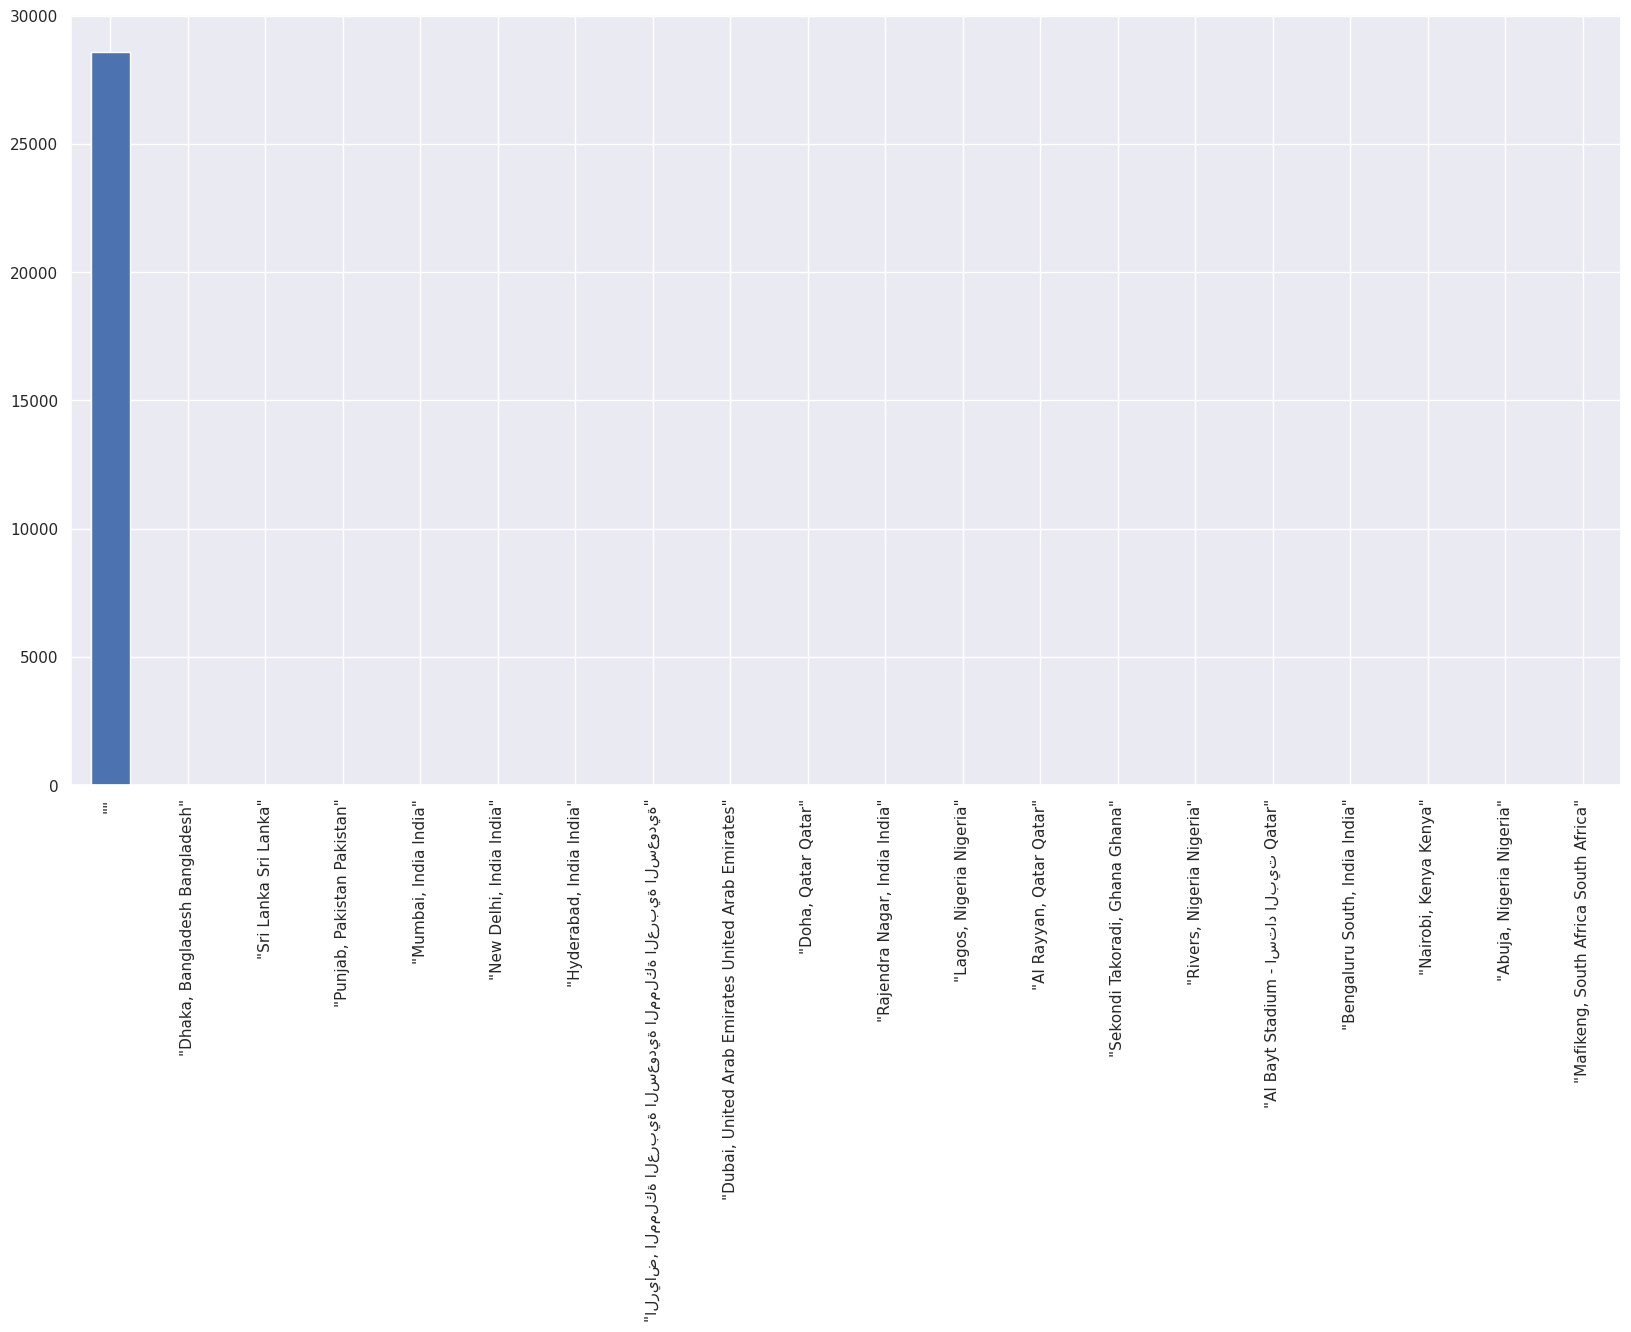

In [20]:
#Plotting the number of tweets based on the location of the tweet
en_data.Tweet_Location.value_counts()[:20].plot.bar()

<Axes: >

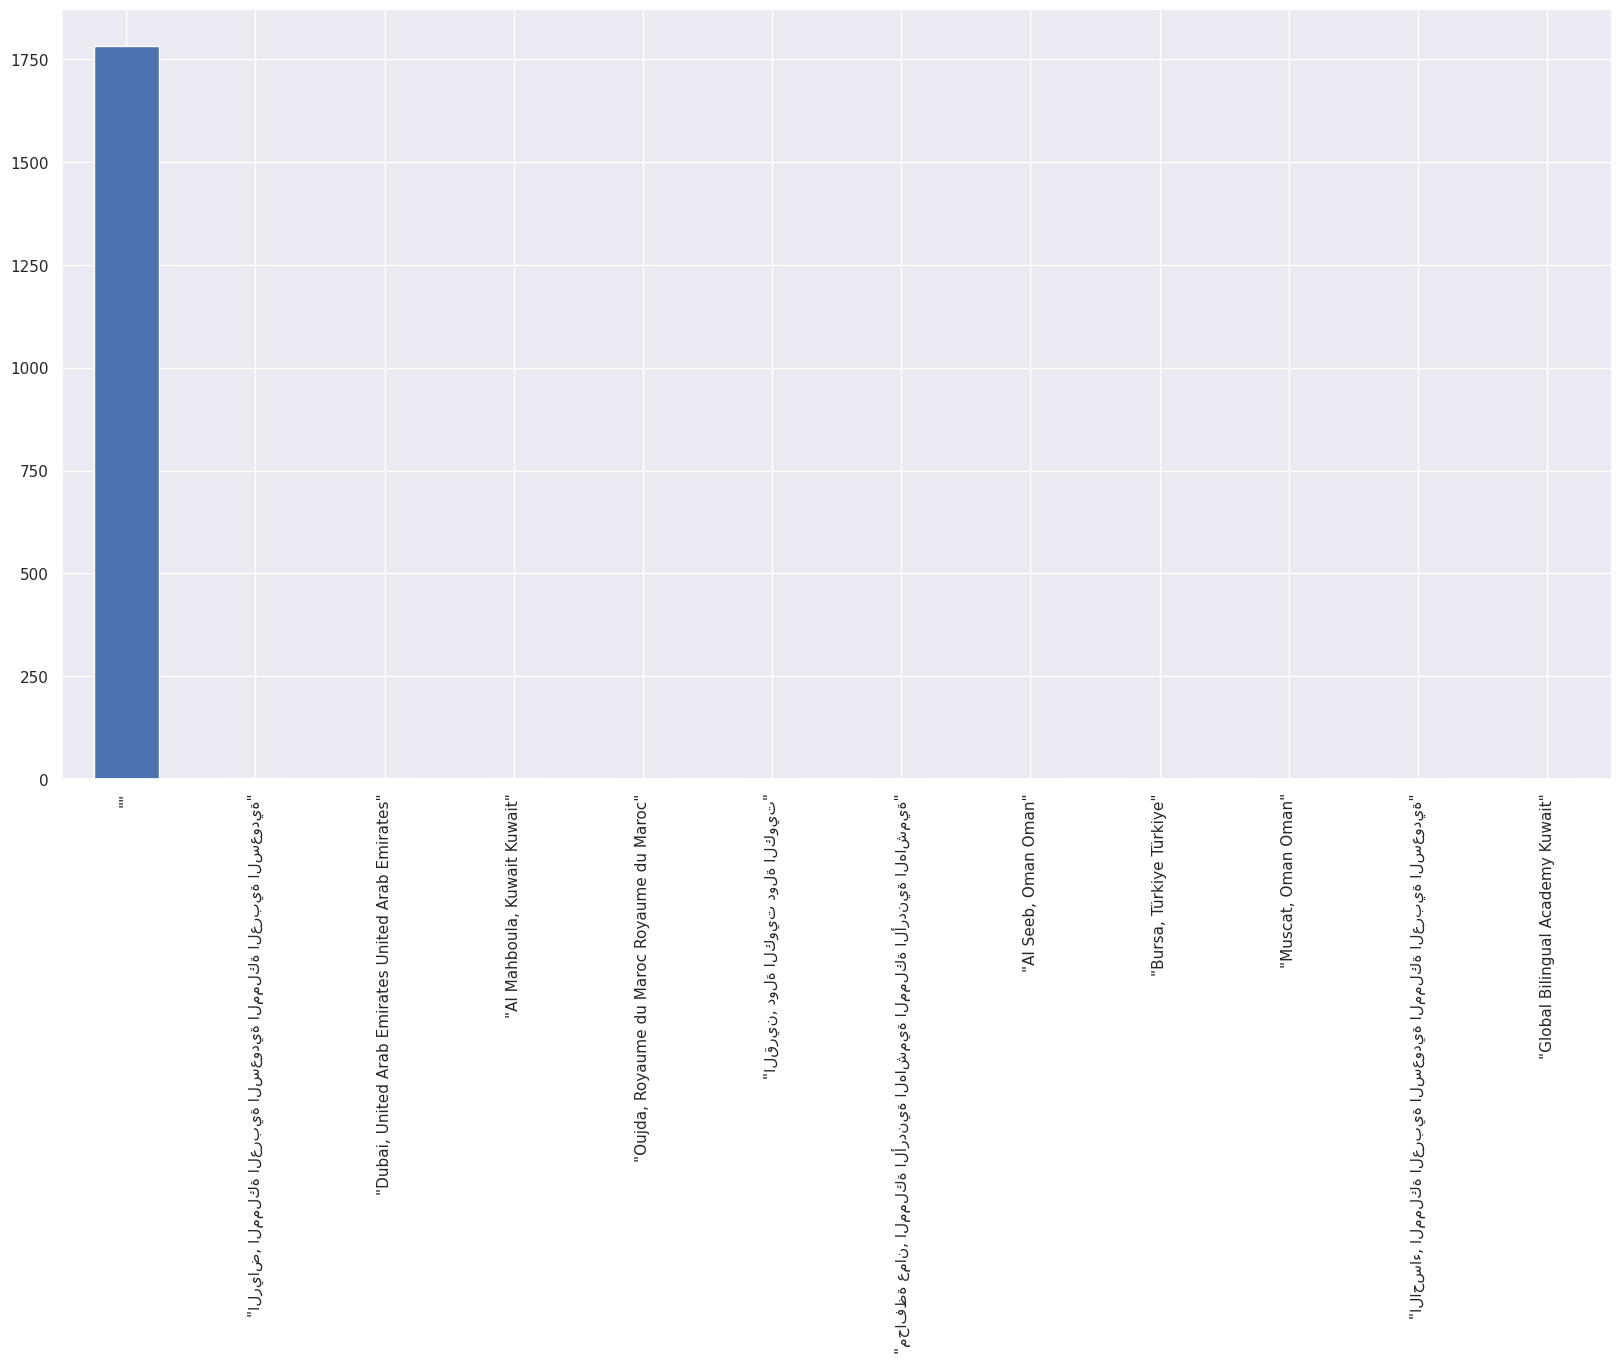

In [21]:
# prompt: #Plotting the number of tweets based on the location of the tweet ar_data.Tweet_Location.value_counts()[:20].plot.bar()

ar_data.Tweet_Location.value_counts()[:20].plot.bar()


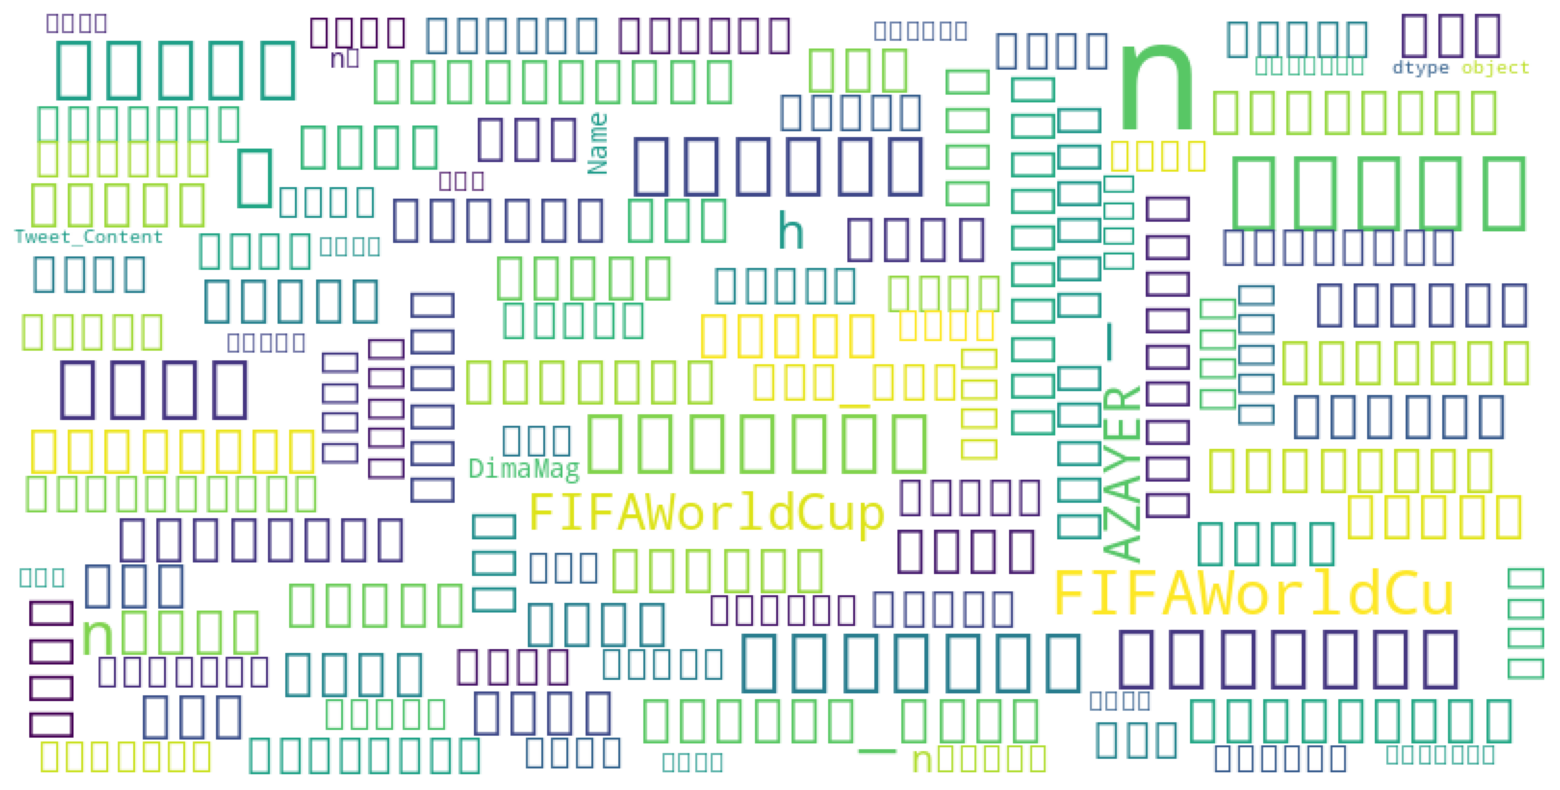

In [23]:
# For Arabic
#Wordclouds using nltk stopwords based on unique tweets and ordered by number of retweets
unique_tweets = ar_data.drop_duplicates(subset = ['Tweet_Content'])
stopwords_set = set(stopwords.words('arabic'))
wordcloud= WordCloud(background_color = 'white',
                    stopwords=stopwords_set,
                    max_words=300,
                    max_font_size=40,
                    scale = 2,
                    random_state=42
                    ).generate(str(unique_tweets.sort_values(by = 'Retweets_Received').iloc[:20]['Tweet_Content']))
print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
print(stopwords_set)

{'تانِ', 'شيكل', 'في', 'بعد', 'إذن', 'ما برح', 'إياكما', 'مائة', 'ألف', 'بهما', 'لهما', 'رويدك', 'كلاهما', 'ذه', 'لهن', 'ولو', 'ذلكن', 'آها', 'له', 'كأنما', 'لما', 'ع', 'صهْ', 'لام', 'قبل', 'زاي', 'تسعة', 'هَذِه', 'تعلَّم', 'نَخْ', 'ذاك', 'ستين', 'إذما', 'يناير', 'نا', 'هاك', 'حاي', 'فيها', 'خاصة', 'هَذانِ', 'أعطى', 'سبعة', 'كاف', 'إلّا', 'راء', 'قاطبة', 'أولالك', 'كليهما', 'كيف', 'تحت', 'استحال', 'قام', 'ليستا', 'شباط', 'طفق', 'ا', 'كذا', 'ذ', 'ه', 'عل', 'عوض', 'تي', 'لمّا', 'ذو', 'أمّا', 'ذِي', 'أبٌ', 'باء', 'ذيت', 'هَؤلاء', 'فإذا', 'كأين', 'خمسة', 'بسّ', 'لكيلا', 'إحدى', 'قاف', 'أعلم', 'بهم', 'حسب', 'مكانكنّ', 'سحقا', 'لوما', 'عشرين', 'وا', 'لكنَّ', 'نَّ', 'فيفري', 'ظاء', 'ثمان', 'أينما', 'هيا', 'طاق', 'سقى', 'مثل', 'اللتين', 'أولاء', 'شتان', 'إذ', 'عشر', 'أصبح', 'لات', 'يوليو', 'ما انفك', 'واو', 'فمن', 'علًّ', 'وهب', 'إما', 'ياء', 'عيانا', 'ثلاثون', 'مهما', 'آهِ', 'ت', 'نفس', 'تاسع', 'فلان', 'فيم', 'أفعل به', 'لئن', 'تاء', 'ل', 'ثلاثة', 'أنتِ', 'ظنَّ', 'قطّ', 'لم', 'غ', 'شرع', 'أما

In [25]:
for letter in '#.][!XR':
    ar_data['Tweet_Content'] = ar_data['Tweet_Content'].astype(str).str.replace(letter,'')

<ipython-input-25-a91eda445cef>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ar_data['Tweet_Content'] = ar_data['Tweet_Content'].astype(str).str.replace(letter,'')


In [26]:
#Preprocess data
import string
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
print(punctuations_list)
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    # print(text)
    return text.translate(translator)

`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
#normalize_arabic
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    print(text)
    return text

In [28]:
#remove_repeating_char
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [29]:
#processPost for applying all functions
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)

    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)

    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)

    # normalize the tweet
    tweet= normalize_arabic(tweet)

    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    return tweet


In [30]:
#applying processPost function for preprocessing
ar_data["Tweet_Content"] = ar_data['Tweet_Content'].apply(lambda x: processPost(x)) # apply used to call the method processpost

Streaming output truncated to the last 5000 lines.

الجائزه 🎁
 1500 ريال نقداً 

لاتنسي
متابعه الحساب
ريتويت ولايك للتغريده
جميع المشاركات مقبوله

كاسالعالمقطر2022
FIFAWorldCup  
مسابقهدبيشي  
The Truth
ProphetMuhammad ﷺ
FIFAWorldCup 
HadithOfTheDay 
SearchTheTruth  
شانِ رسالت ﷺ
ProphetMuhammad ﷺ
FIFAWorldCup 
Trueislam
SearchTheTruth  
ومن لها غير ممثل ومشرف الوطن في جميع المحافل الخارجيه والمحليه حق مكتسب ل كبيراسيا الهلال مونديالالانديه الهلالاليكاسالعالم FIFAWorldCup FIFAWorldCupQatar2022 اكشنمعوليد وليدالفراج جيانيانفانتينو         💙🇸🇦💚  
حدثني احد الاحبه 😝

وضع البعض امس 😂👇

FIFAWorldCup 
MoroccoVsFrance  
لم يسيئ لرسول الله صلي الله عليه وسلم الا اصحاب الشذوذ والمتشبهين بالنساء FIFAWorldCup  مقاطعهالمنتجاتالفرنسيه781
انا العناد انا الطموح انا الامل انا الغريب انا المريب انا الجدال انا القوي انا الزعيم انا البطل انا الوقوف رغم الظروف الهلالاليكاسالعالم كبيراسيا الهلال FIFAWorldCup FIFAWorldCupQatar2022     💙🏆💙  
مبابي هرب ولكن كان لمرابط رايٌ اخر

📦 اشترك الان 👇

🔗  
📱  

قطر202

In [31]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
#Getting Tokenize the tweet text
tokenizer = RegexpTokenizer(r'\w+')
ar_data["Tweet_Content"] = ar_data["Tweet_Content"].apply(tokenizer.tokenize)

In [32]:
ar_data["Tweet_Content"].head()

84     [كاريكاتير, لرسام, الاسرائيلي, يوري, فينك, يشي...
94     [عاجل, نهائي, كاس, العالم, سيكون, بين, الارجنت...
359    [بالفيديو, الجماهير, المغربيه, والعربيه, في, ا...
394    [ان, شاء, اله, ستنقلب, افراحكم, احزان, يوم, ال...
408    [هل, كان, ه, ناك, منتخب, اخر, كان, يستحق, التو...
Name: Tweet_Content, dtype: object

In [33]:
stopwords_list = stopwords.words('arabic')

In [ ]:
stopwords_list

In [36]:
listToStr = ' '.join([str(elem) for elem in stopwords_list])
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [37]:
#Removing stop words
ar_data["Tweet_Content"]=ar_data["Tweet_Content"].apply(lambda x: [item for item in x if item not in stopwords_list])


In [38]:
#Tweet text information
all_words = [word for tokens in ar_data["Tweet_Content"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in ar_data["Tweet_Content"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

30724 words total, with a vocabulary size of 4611
Max sentence length is 44


In [39]:
#top 10 words
counter = Counter(all_words)
counter.most_common(35)

[('FIFAWorldCup', 1668),
 ('Qatar202', 744),
 ('المغرب', 568),
 ('المغربفرنسا', 504),
 ('فرنسا', 462),
 ('كاسالعالمقطر202', 436),
 ('قطر202', 406),
 ('علي', 339),
 ('العالم', 338),
 ('كاس', 312),
 ('كاسالعالمFIFA', 267),
 ('نهائي', 218),
 ('مباراه', 214),
 ('منتخب', 210),
 ('كاسالعالم', 197),
 ('الارجنتين', 188),
 ('الارجنتينكرواتيا', 176),
 ('فرنسالمغرب', 163),
 ('اله', 162),
 ('الي', 161),
 ('قطر', 156),
 ('المنتخب', 150),
 ('قطرقروب', 142),
 ('العربيه', 141),
 ('نصف', 132),
 ('الفرنسي', 130),
 ('السحب', 125),
 ('202', 118),
 ('مونديالقطر', 116),
 ('ديمامغرب', 104),
 ('المغربي', 101),
 ('مبابي', 101),
 ('فيديو', 98),
 ('هديه', 92),
 ('MorocoVsFrance', 89)]

In [40]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

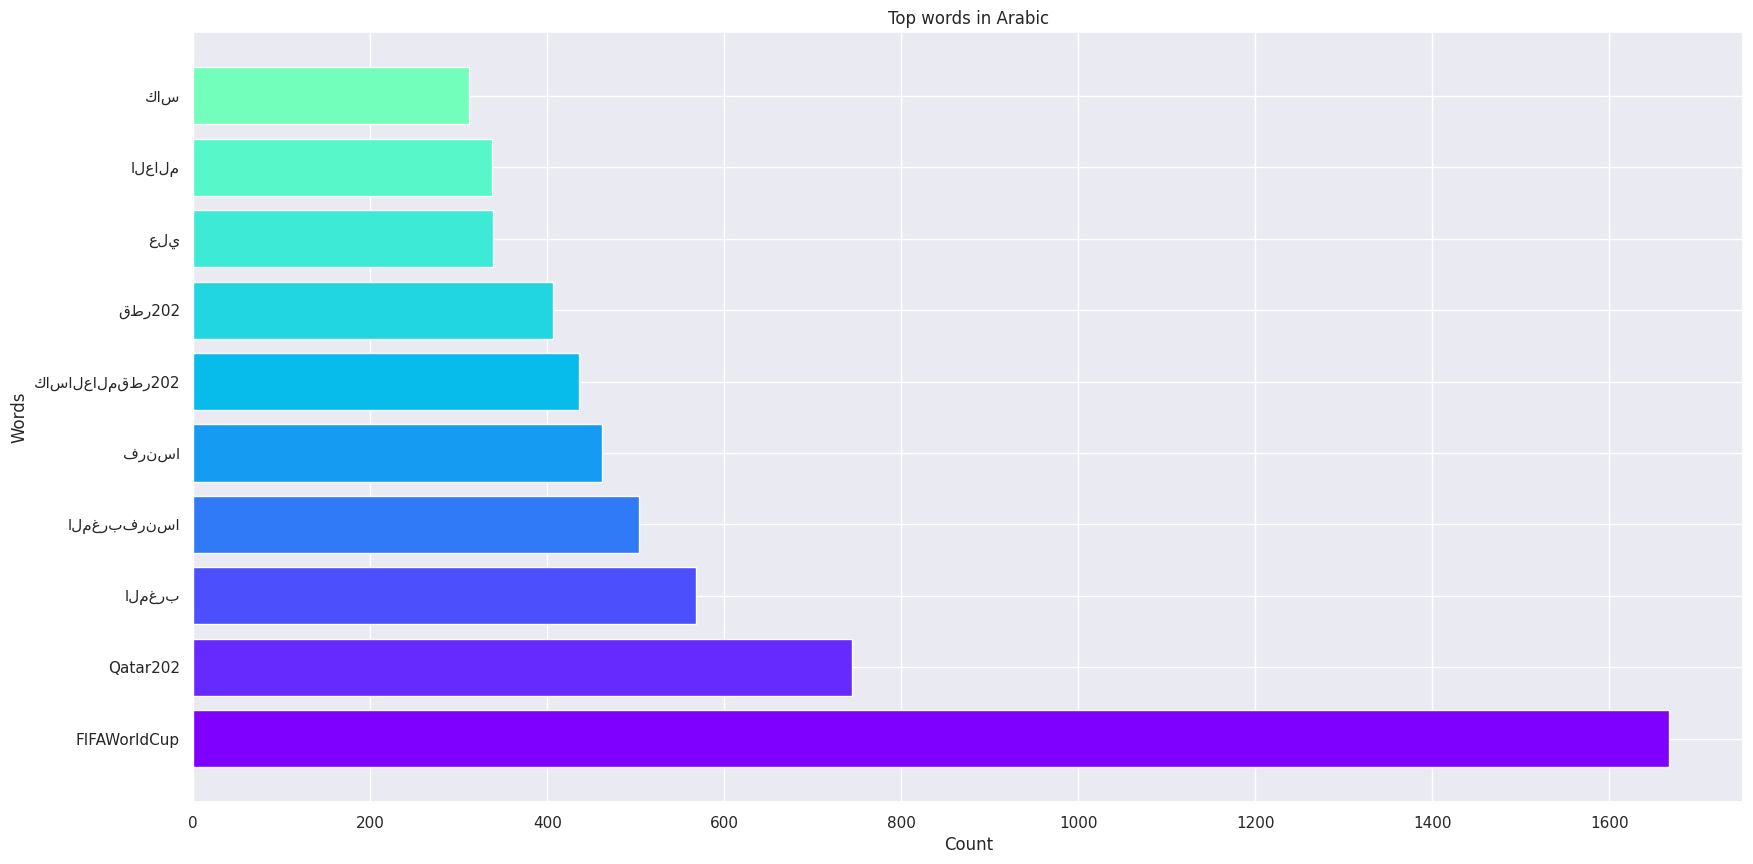

In [41]:
import matplotlib.cm as cm
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 20))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in Arabic')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [43]:
print(type(ar_data.Tweet_Content))

<class 'pandas.core.series.Series'>


In [49]:
single_ar_string = ' '.join(ar_data)
print(single_ar_string)

Tweet_Id Tweet_URL Tweet_Posted_Time Tweet_Content Tweet_Type Client Retweets_Received Likes_Received Tweet_Location Tweet_Language User _Id Name Username User_Bio Verified_or_Non-Verified Profile_URL User_Followers User_Following User_Accoun_ Creation_Date num_chars num_words


In [51]:
#Arabic
#Hastag Analysis
num_chars = ar_data.Tweet_Content.apply(len)
num_words = ar_data.Tweet_Content.apply(lambda x: sum(len(word.split()) for word in x))
ar_data['num_chars'] = num_chars
ar_data['num_words'] = num_words

In [52]:
print(f"average num characters: {num_chars.mean()}")
print(f"average num words : {num_words.mean()}")
print(f"median num characters: {num_chars.median()}")
print(f"median num words: {num_words.median()}")

average num characters: 17.106904231625837
average num words : 17.106904231625837
median num characters: 16.0
median num words: 16.0


In [53]:
ar_data.groupby(ar_data['num_chars'])[['Retweets_Received','Likes_Received']].describe().reset_index()

num_chars Retweets_Received                                     \
                         count mean  std  min  25%  50%  75%  max   
0          1               8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1          2              11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2          3              19.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3          4              20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4          5              22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5          6              41.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6          7              64.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7          8              74.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8          9              68.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9         10             141.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10        11              53.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11        12              84.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12        13             100.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
13        14              85.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14        15              59.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15        16              75.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
16        17              73.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
17        18             102.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18        19              95.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19        20              53.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
20        21              35.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21        22              46.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
22        23              74.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
23        24              41.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
24        25              39.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25        26              26.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
26        27              54.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
27        28              34.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
28        29              40.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
29        30               7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
30        31              32.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
31        32              34.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
32        33              20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
33        34               9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
34        35              16.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
35        36              25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
36        37               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
37        38               8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
38        39               5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39        40               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
40        41               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
41        44               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   

   Likes_Received                                     
            count mean  std  min  25%  50%  75%  max  
0             8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1            11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2            19.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3            20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4            22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5            41.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6            64.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7            74.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
8            68.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9           141.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10           53.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11           84.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
12          100.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
13           85.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
14           59.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15           75.0  0.0  0.0  0.

In [54]:
#Sentiment Analysis Dataset Builder
sentiment_df = df[['Tweet_Id', 'Tweet_Content', 'Tweet_Language']] # Filtering Columns
sentiment_df = sentiment_df.loc[sentiment_df['Tweet_Language'] == 'Arabic'].reset_index(drop=True)  # Filtering language

In [55]:
def preprocess(text):
    new_text = []

    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

sentiment_df['Tweet_Content'] = sentiment_df['Tweet_Content'].apply(preprocess)

In [56]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [57]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment").to(device)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [58]:
import urllib
import csv
labels=[]
task = 'sentiment'
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [59]:
from scipy.special import softmax
BATCH_SIZE = 10

scores_all = np.empty((0,len(labels)))
text_all = sentiment_df['Tweet_Content'].to_list()
n = len(text_all)
with torch.no_grad():
    for start_idx in range(0, n, BATCH_SIZE):
        end_idx = min(start_idx+BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, truncation=True).to(device)
        output = model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores
        torch.cuda.empty_cache()


sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [60]:
sentiment_df.to_csv("/content/Tweets_Sentiment_Analysis_RoBERTa_Raw_Values_ar.csv", index=False)
from textblob import TextBlob
def get_sentiment(tweet):
    sentiment = TextBlob(tweet).sentiment
    return sentiment.polarity, sentiment.subjectivity

sentiment_df['sentiment'] = sentiment_df['Tweet_Content'].apply(get_sentiment)

In [61]:
print(sentiment_df['sentiment'])

0       (0.0, 0.0)
1       (0.0, 0.0)
2       (0.0, 0.0)
3       (0.0, 0.0)
4       (0.0, 0.0)
           ...    
1791    (0.0, 0.0)
1792    (0.0, 0.0)
1793    (0.0, 0.0)
1794    (0.0, 0.0)
1795    (0.0, 0.0)
Name: sentiment, Length: 1796, dtype: object


In [62]:
sentiment_df['polarity'] = sentiment_df['sentiment'].apply(lambda x:x[0])
sentiment_df['subjectivity'] = sentiment_df['sentiment'].apply(lambda x:x[0])
sentiment_df.drop('sentiment', axis=1, inplace=True)
sentiment_df.to_csv("./Tweets_Sentiment_Analysis_BOW_Raw_Values_ar.csv", index=False)

emotion_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
emotion_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion").to(device)

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

# Continue ----point--01

In [63]:
task='emotion'
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [64]:
print(sentiment_df['Tweet_Content'])

0       "كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إ...
1       "🚨عــاجــل |\n\nنهائي كأس العالم سيكون بين الا...
2       "بالفيديو | الجماهير المغربية والعربية في الكو...
3            "ان شاء الله ستنقلب افراحكم أحزان يوم الأحد"
4       "هل كان هُناك منتخب آخر كان يستحق التواجد في ا...
                              ...                        
1791    "سجدة شكر للاعبي المغرب و تحية للجماهير بعد مش...
1792    "حسين حاكم: عيالي لو تسألهم من تبي ياخذ كأس ال...
1793    "DM NOW FOR Registered \nWe are In All of kuwa...
1794    "📸 #كأس_العالم_FIFA قطر 2022 - جدول مباريات دو...
1795    "بماذا تسمّى الطريقة التي سدد بها #أشرف_حكيمي ...
Name: Tweet_Content, Length: 1796, dtype: object


In [65]:
print(type(sentiment_df['Tweet_Content']))

<class 'pandas.core.series.Series'>


In [66]:
print(sentiment_df['Tweet_Content'])

0       "كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إ...
1       "🚨عــاجــل |\n\nنهائي كأس العالم سيكون بين الا...
2       "بالفيديو | الجماهير المغربية والعربية في الكو...
3            "ان شاء الله ستنقلب افراحكم أحزان يوم الأحد"
4       "هل كان هُناك منتخب آخر كان يستحق التواجد في ا...
                              ...                        
1791    "سجدة شكر للاعبي المغرب و تحية للجماهير بعد مش...
1792    "حسين حاكم: عيالي لو تسألهم من تبي ياخذ كأس ال...
1793    "DM NOW FOR Registered \nWe are In All of kuwa...
1794    "📸 #كأس_العالم_FIFA قطر 2022 - جدول مباريات دو...
1795    "بماذا تسمّى الطريقة التي سدد بها #أشرف_حكيمي ...
Name: Tweet_Content, Length: 1796, dtype: object


In [67]:
import re

# Define a function to remove emojis using regex
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"  # ⏰ clock
                               u"\U000023F0"              # ⏰ clock alternative representation
                               u"\u23F1"                  # ⏱
                               u"\u23EA"                  # ⏪
                               u"\u23F3"                  # ⏳
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Apply the remove_emojis function to the 'Tweet_Content' column
sentiment_df['Tweet_Content'] = sentiment_df['Tweet_Content'].apply(remove_emojis)

# Print the updated 'Tweet_Content' column
print(sentiment_df['Tweet_Content'])


0       "كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إ...
1       "عــاجــل |\n\nنهائي كأس العالم سيكون بين الار...
2       "بالفيديو | الجماهير المغربية والعربية في الكو...
3            "ان شاء الله ستنقلب افراحكم أحزان يوم الأحد"
4       "هل كان هُناك منتخب آخر كان يستحق التواجد في ا...
                              ...                        
1791    "سجدة شكر للاعبي المغرب و تحية للجماهير بعد مش...
1792    "حسين حاكم: عيالي لو تسألهم من تبي ياخذ كأس ال...
1793    "DM NOW FOR Registered \nWe are In All of kuwa...
1794    " #كأس_العالم_FIFA قطر 2022 - جدول مباريات دور...
1795    "بماذا تسمّى الطريقة التي سدد بها #أشرف_حكيمي ...
Name: Tweet_Content, Length: 1796, dtype: object


In [68]:
print(sentiment_df['Tweet_Content'].head(20))

0     "كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إ...
1     "عــاجــل |\n\nنهائي كأس العالم سيكون بين الار...
2     "بالفيديو | الجماهير المغربية والعربية في الكو...
3          "ان شاء الله ستنقلب افراحكم أحزان يوم الأحد"
4     "هل كان هُناك منتخب آخر كان يستحق التواجد في ا...
5     "يكفي أن مشهد الوحدة خلف منتخب #المغرب ردنا إل...
6     " لا تفوّت مشاهدة كأس الساطير \n\n اضبط ساعتك ...
7     "شاهد بالفيديو رد فعل جماهير المونديال عند تنا...
8     "محمد أبو تريكة: وحدتم الشعوب العربية وشرفتم ا...
9     "مواصلات: تشغيل ناجح لـ 2,826 حافلة لنقل 251,5...
10    "سعادة الشيخ محمد بن حمد بن قاسم آل ثاني وزير ...
11    "هزيمه المغرب من فرنسا و لكن كلنا ممتنون لما ق...
12    "\nالرئيس الفرنسي إيمانويل ماكرون يحتفل مع لاع...
13    "شاهد بالفيديو رد فعل جماهير المونديال عند تنا...
14    "سعادة السيدة لولوة بنت راشد الخاطر مساعد وزير...
15                        "من اكثر اللاعبين الي اعشقهم"
16    "القائم ينقذ #المغرب من هدف ثان لـ #فرنسا ويتص...
17    "ويجز  عز العرب  اغنية كاس العالم الجديدة\

In [69]:
import re

def remove_hashtags(text):
    # Remove hashtags (words starting with #)
    return re.sub(r'#\w+', '', text)

# Apply the remove_hashtags function to the 'Tweet_Content' column
sentiment_df['Tweet_Content'] = sentiment_df['Tweet_Content'].apply(remove_hashtags)

# Print the updated 'Tweet_Content' column for the first 20 rows
print(sentiment_df['Tweet_Content'].head(20))


0     "كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إ...
1     "عــاجــل |\n\nنهائي كأس العالم سيكون بين الار...
2     "بالفيديو | الجماهير المغربية والعربية في الكو...
3          "ان شاء الله ستنقلب افراحكم أحزان يوم الأحد"
4     "هل كان هُناك منتخب آخر كان يستحق التواجد في ا...
5     "يكفي أن مشهد الوحدة خلف منتخب  ردنا إلى الحقي...
6     " لا تفوّت مشاهدة كأس الساطير \n\n اضبط ساعتك ...
7     "شاهد بالفيديو رد فعل جماهير المونديال عند تنا...
8     "محمد أبو تريكة: وحدتم الشعوب العربية وشرفتم ا...
9     "مواصلات: تشغيل ناجح لـ 2,826 حافلة لنقل 251,5...
10    "سعادة الشيخ محمد بن حمد بن قاسم آل ثاني وزير ...
11    "هزيمه المغرب من فرنسا و لكن كلنا ممتنون لما ق...
12    "\nالرئيس الفرنسي إيمانويل ماكرون يحتفل مع لاع...
13    "شاهد بالفيديو رد فعل جماهير المونديال عند تنا...
14    "سعادة السيدة لولوة بنت راشد الخاطر مساعد وزير...
15                        "من اكثر اللاعبين الي اعشقهم"
16    "القائم ينقذ  من هدف ثان لـ  ويتصدى لتسديدة من...
17    "ويجز  عز العرب  اغنية كاس العالم الجديدة\

In [70]:
import re

def remove_hashtags_mentions_urls(text):
    # Remove hashtags (only the # symbol)
    text = re.sub(r'#', '', text)

    # Remove mentions (words starting with @)
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'http?', '', text, flags=re.MULTILINE)

    return text

# Apply the remove_hashtags_mentions_urls function to the 'Tweet_Content' column
sentiment_df['Tweet_Content'] = sentiment_df['Tweet_Content'].apply(remove_hashtags_mentions_urls)

# Print the updated 'Tweet_Content' column for the first 20 rows
print(sentiment_df['Tweet_Content'].head(20))


0     "كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إ...
1     "عــاجــل |\n\nنهائي كأس العالم سيكون بين الار...
2     "بالفيديو | الجماهير المغربية والعربية في الكو...
3          "ان شاء الله ستنقلب افراحكم أحزان يوم الأحد"
4     "هل كان هُناك منتخب آخر كان يستحق التواجد في ا...
5     "يكفي أن مشهد الوحدة خلف منتخب  ردنا إلى الحقي...
6     " لا تفوّت مشاهدة كأس الساطير \n\n اضبط ساعتك ...
7     "شاهد بالفيديو رد فعل جماهير المونديال عند تنا...
8     "محمد أبو تريكة: وحدتم الشعوب العربية وشرفتم ا...
9     "مواصلات: تشغيل ناجح لـ 2,826 حافلة لنقل 251,5...
10    "سعادة الشيخ محمد بن حمد بن قاسم آل ثاني وزير ...
11    "هزيمه المغرب من فرنسا و لكن كلنا ممتنون لما ق...
12    "\nالرئيس الفرنسي إيمانويل ماكرون يحتفل مع لاع...
13    "شاهد بالفيديو رد فعل جماهير المونديال عند تنا...
14    "سعادة السيدة لولوة بنت راشد الخاطر مساعد وزير...
15                        "من اكثر اللاعبين الي اعشقهم"
16    "القائم ينقذ  من هدف ثان لـ  ويتصدى لتسديدة من...
17    "ويجز  عز العرب  اغنية كاس العالم الجديدة\

In [71]:
print(type(sentiment_df['Tweet_Content']))

<class 'pandas.core.series.Series'>


In [72]:
print(sentiment_df['Tweet_Content'].head(10))

0    "كاريكاتير للرسام الإسرائيلي يوري فينك؛ يشير إ...
1    "عــاجــل |\n\nنهائي كأس العالم سيكون بين الار...
2    "بالفيديو | الجماهير المغربية والعربية في الكو...
3         "ان شاء الله ستنقلب افراحكم أحزان يوم الأحد"
4    "هل كان هُناك منتخب آخر كان يستحق التواجد في ا...
5    "يكفي أن مشهد الوحدة خلف منتخب  ردنا إلى الحقي...
6    " لا تفوّت مشاهدة كأس الساطير \n\n اضبط ساعتك ...
7    "شاهد بالفيديو رد فعل جماهير المونديال عند تنا...
8    "محمد أبو تريكة: وحدتم الشعوب العربية وشرفتم ا...
9    "مواصلات: تشغيل ناجح لـ 2,826 حافلة لنقل 251,5...
Name: Tweet_Content, dtype: object


In [73]:
# Set the maximum column width to display more content
pd.set_option('display.max_colwidth', None)

# Set the maximum number of rows to display
pd.set_option('display.max_rows', 10)

# Print the DataFrame
# print(sentiment_df[['Tweet_Content']].head(10).to_string(index=False))
strRes = sentiment_df[['Tweet_Content']].head(10).to_string(index=False)



In [ ]:
pip install --upgrade googletrans==4.0.0-rc1

In [103]:
from googletrans import Translator
import time

translator = Translator(service_urls=['translate.google.com'])

text_all = sentiment_df['Tweet_Content'].to_list()

for i in range(len(text_all)):
    try:
        translation = translator.translate(text_all[i], dest='en', src='ar').text
        print(translation)
        text_all[i] = translation
        time.sleep(0.3)  # Introduce a delay of half a second
    except Exception as e:
        print(f"Translation error for '{text_all[i]}': {str(e)}")
        break
        # You can choose to keep the original text or handle it as per your requirement

print(text_all)
resulting_string = ' '.join(text_all)
print(type(resulting_string))



# from googletrans import Translator

# translator = Translator()

# text_all = sentiment_df['Tweet_Content'].to_list()

# for i in range(len(text_all)):
#     translation = translator.translate(text_all[i], dest='en', src='ar').text
#     print(translation)
#     text_all[i] = translation

# print(text_all)
# resulting_string = ' '.join(text_all)
# print(type(resulting_string))


Streaming output truncated to the last 5000 lines.

• Withdrawal video, video, interaction
 "
"

The face of the rail came down two goals, Morocco won a goal and left the World Cup
"Al -Shayeb Al -Ayeb"
Ashraf Hakimi Killian Mbappe
The media center nearly two hours before the start of the match
"Events accompanying a match in the home stadium
"A Moroccan public review in the vicinity of the home stadium ... and French participating

  

"Families outside the home stadium
"Players inspect the ground of the home stadium
Who is the 2022 World Cup champion?
 

the prize
Benitage ring or a peridot stone according to the choice.

Do not forget:
Follow the account
Retwett and Lake for tweet
All posts are acceptable
" -
"Friendship and top the scene ... and" black "
"Moroccan Noureddine Amrabat supports his country from the stands of the home stadium
" -
"


Learn about my list
"Families are waiting for the beginning
"Moroccan global producer Redwan, responsible for entertainment services in" 

In [105]:
print(type(text_all[3]))
print(text_all[5])

<class 'str'>
It is sufficient that the scene of unity is behind the team, our response to the truth, which is that we are one nation ...
For the first time, the borders and policy discounts fall at the feet of the players
For the first time I see football brings us together and does not separate us




"


In [106]:
BATCH_SIZE = 10

scores_all = np.empty((0,len(labels)))
# text_all = sentiment_df['Tweet_Content'].to_list() #Fix--009
print(type(text_all))

n = len(text_all)
with torch.no_grad():
    for start_idx in range(0, n, BATCH_SIZE):
        end_idx = min(start_idx+BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, truncation=True).to(device)
        output = emotion_model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores
        torch.cuda.empty_cache()


sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)

<class 'list'>


In [107]:
print(text_all)

['"Caricature of Israeli painter Yuri Vink indicates that the World Cup has shown the failure of normalization agreements, saying:\n"We lost the World Cup, without even participating in it."', 'Hurry up\n\nThe World Cup final will be between Argentina and France, on Sunday, December 18th.\n"', 'In the video | Moroccan and Arab fans in Kuwait for the Moroccan players in the World Cup: You raised the Arab head', '"God willing, your joys will turn on Sunday."', '“Was there another team that deserved to be in the final?\n\n |"', 'It is sufficient that the scene of unity is behind the team, our response to the truth, which is that we are one nation ...\nFor the first time, the borders and policy discounts fall at the feet of the players\nFor the first time I see football brings us together and does not separate us\n\n\n\n\n"', 'Do not miss watching the Al -Sirir Cup\n\n Adjust your watch and be at the heart of the event\n\n Thursday and Friday on Bein SPORTS Max 2\n\n subscribe now', 'Watch

In [108]:
def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        # for emoji in emojis.keys():
        #     tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')

        processedText.append(tweetwords)
    return processedText

In [136]:
print(text_all)

['"Caricature of Israeli painter Yuri Vink indicates that the World Cup has shown the failure of normalization agreements, saying:\n"We lost the World Cup, without even participating in it."', 'Hurry up\n\nThe World Cup final will be between Argentina and France, on Sunday, December 18th.\n"', 'In the video | Moroccan and Arab fans in Kuwait for the Moroccan players in the World Cup: You raised the Arab head', '"God willing, your joys will turn on Sunday."', '“Was there another team that deserved to be in the final?\n\n |"', 'It is sufficient that the scene of unity is behind the team, our response to the truth, which is that we are one nation ...\nFor the first time, the borders and policy discounts fall at the feet of the players\nFor the first time I see football brings us together and does not separate us\n\n\n\n\n"', 'Do not miss watching the Al -Sirir Cup\n\n Adjust your watch and be at the heart of the event\n\n Thursday and Friday on Bein SPORTS Max 2\n\n subscribe now', 'Watch

In [139]:
n = len(text_all)
with torch.no_grad():
    for start_idx in range(0, n, BATCH_SIZE):
        end_idx = min(start_idx+BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, truncation=True).to(device)
        output = emotion_model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores
        torch.cuda.empty_cache()


sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)

In [140]:
print(type(text_all))

<class 'list'>


In [141]:
sentiment_df['Tweet_Content'] = text_all


In [142]:
# print(sentiment_df['Tweet_Content'])
sentiment_df['Tweet_Content'].head()

0    "Caricature of Israeli painter Yuri Vink indicates that the World Cup has shown the failure of normalization agreements, saying:\n"We lost the World Cup, without even participating in it."
1                                                                                              Hurry up\n\nThe World Cup final will be between Argentina and France, on Sunday, December 18th.\n"
2                                                                             In the video | Moroccan and Arab fans in Kuwait for the Moroccan players in the World Cup: You raised the Arab head
3                                                                                                                                                   "God willing, your joys will turn on Sunday."
4                                                                                                                                “Was there another team that deserved to be in the final?\n\n |"
Name: Tweet_Content, dtype: ob

In [143]:
sentiment_df.to_csv("./Tweets_Emotion_Analysis_RoBERTa_Emotion_Raw_Values_Ar_to_En.csv", index=False)

In [144]:
sentiment_df.head()

,Tweet_Id,Tweet_Content,Tweet_Language,negative,neutral,positive,polarity,subjectivity,anger,joy,optimism,sadness
0,"""1603309107334766592""","""Caricature of Israeli painter Yuri Vink indicates that the World Cup has shown the failure of normalization agreements, saying:\n""We lost the World Cup, without even participating in it.""",Arabic,0.174641,0.787888,0.037471,0.0,0.0,0.194949,0.021252,0.034421,0.749378
1,"""1603309091883028480""","Hurry up\n\nThe World Cup final will be between Argentina and France, on Sunday, December 18th.\n""",Arabic,0.177503,0.783759,0.038738,0.0,0.0,0.055392,0.750733,0.142193,0.051682
2,"""1603308942687408128""",In the video | Moroccan and Arab fans in Kuwait for the Moroccan players in the World Cup: You raised the Arab head,Arabic,0.226165,0.739625,0.034209,0.0,0.0,0.136611,0.732227,0.089417,0.041745
3,"""1603308899922124800""","""God willing, your joys will turn on Sunday.""",Arabic,0.215455,0.750509,0.034036,0.0,0.0,0.034609,0.155207,0.776915,0.033269
4,"""1603308882268405760""","“Was there another team that deserved to be in the final?\n\n |""",Arabic,0.180804,0.779952,0.039245,0.0,0.0,0.125647,0.451218,0.211581,0.211555


In [145]:
tweet_df = pd.read_csv("./Tweets_Emotion_Analysis_RoBERTa_Emotion_Raw_Values_Ar_to_En.csv", lineterminator='\n')

In [146]:
tweet_df.head()

,Tweet_Id,Tweet_Content,Tweet_Language,negative,neutral,positive,polarity,subjectivity,anger,joy,optimism,sadness
0,"""1603309107334766592""","""Caricature of Israeli painter Yuri Vink indicates that the World Cup has shown the failure of normalization agreements, saying:\n""We lost the World Cup, without even participating in it.""",Arabic,0.174641,0.787888,0.037471,0.0,0.0,0.194949,0.021252,0.034421,0.749378
1,"""1603309091883028480""","Hurry up\n\nThe World Cup final will be between Argentina and France, on Sunday, December 18th.\n""",Arabic,0.177503,0.783759,0.038738,0.0,0.0,0.055392,0.750733,0.142193,0.051682
2,"""1603308942687408128""",In the video | Moroccan and Arab fans in Kuwait for the Moroccan players in the World Cup: You raised the Arab head,Arabic,0.226165,0.739625,0.034209,0.0,0.0,0.136611,0.732227,0.089417,0.041745
3,"""1603308899922124800""","""God willing, your joys will turn on Sunday.""",Arabic,0.215455,0.750509,0.034036,0.0,0.0,0.034609,0.155207,0.776915,0.033269
4,"""1603308882268405760""","“Was there another team that deserved to be in the final?\n\n |""",Arabic,0.180804,0.779952,0.039245,0.0,0.0,0.125647,0.451218,0.211581,0.211555


In [147]:
tweet_df.insert(6, "Sentiment", '')

In [148]:
for i in range(len(tweet_df)):
  if tweet_df['negative'][i] > tweet_df['positive'][i] and tweet_df['negative'][i] > tweet_df['neutral'][i]:
    tweet_df['Sentiment'][i] = 'negative'
  elif tweet_df['positive'][i] > tweet_df['negative'][i] and tweet_df['positive'][i] > tweet_df['neutral'][i]:
    tweet_df['Sentiment'][i]= 'positive'
  else:
    tweet_df['Sentiment'][i] = 'neutral'

In [149]:
tweet_df.drop(['negative','positive','neutral'], axis=1, inplace=True)

In [150]:
tweet_df.drop('Tweet_Language', axis=1, inplace=True)

In [151]:
ar_df_content = tweet_df.Tweet_Content

In [152]:
print(type(ar_df_content))

<class 'pandas.core.series.Series'>


In [153]:
ar_df_content

0                                                                    "Caricature of Israeli painter Yuri Vink indicates that the World Cup has shown the failure of normalization agreements, saying:\n"We lost the World Cup, without even participating in it."
1                                                                                                                                                              Hurry up\n\nThe World Cup final will be between Argentina and France, on Sunday, December 18th.\n"
2                                                                                                                                             In the video | Moroccan and Arab fans in Kuwait for the Moroccan players in the World Cup: You raised the Arab head
3                                                                                                                                                                                                                   "God willing, 

In [155]:
tweet_df.to_csv("./Tweets_Emotion_Analysis_RoBERTa_Emotion_Raw_Values_Ar_to_En1.csv", index=False)

<Axes: xlabel='Sentiment', ylabel='count'>

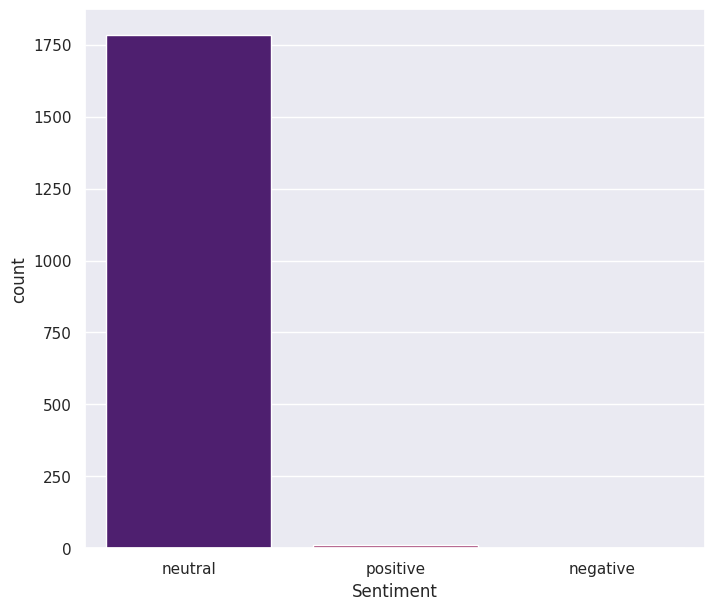

In [156]:
plt.figure(figsize = (8,7))
sns.countplot(x="Sentiment", data=tweet_df, palette='magma')

In [157]:
tweet_neg = tweet_df.loc[tweet_df['Sentiment'] == 'negative'].reset_index(drop=True)
tweet_net = tweet_df.loc[tweet_df['Sentiment'] == 'neutral'].reset_index(drop=True)
tweet_pos = tweet_df.loc[tweet_df['Sentiment'] == 'positive'].reset_index(drop=True)

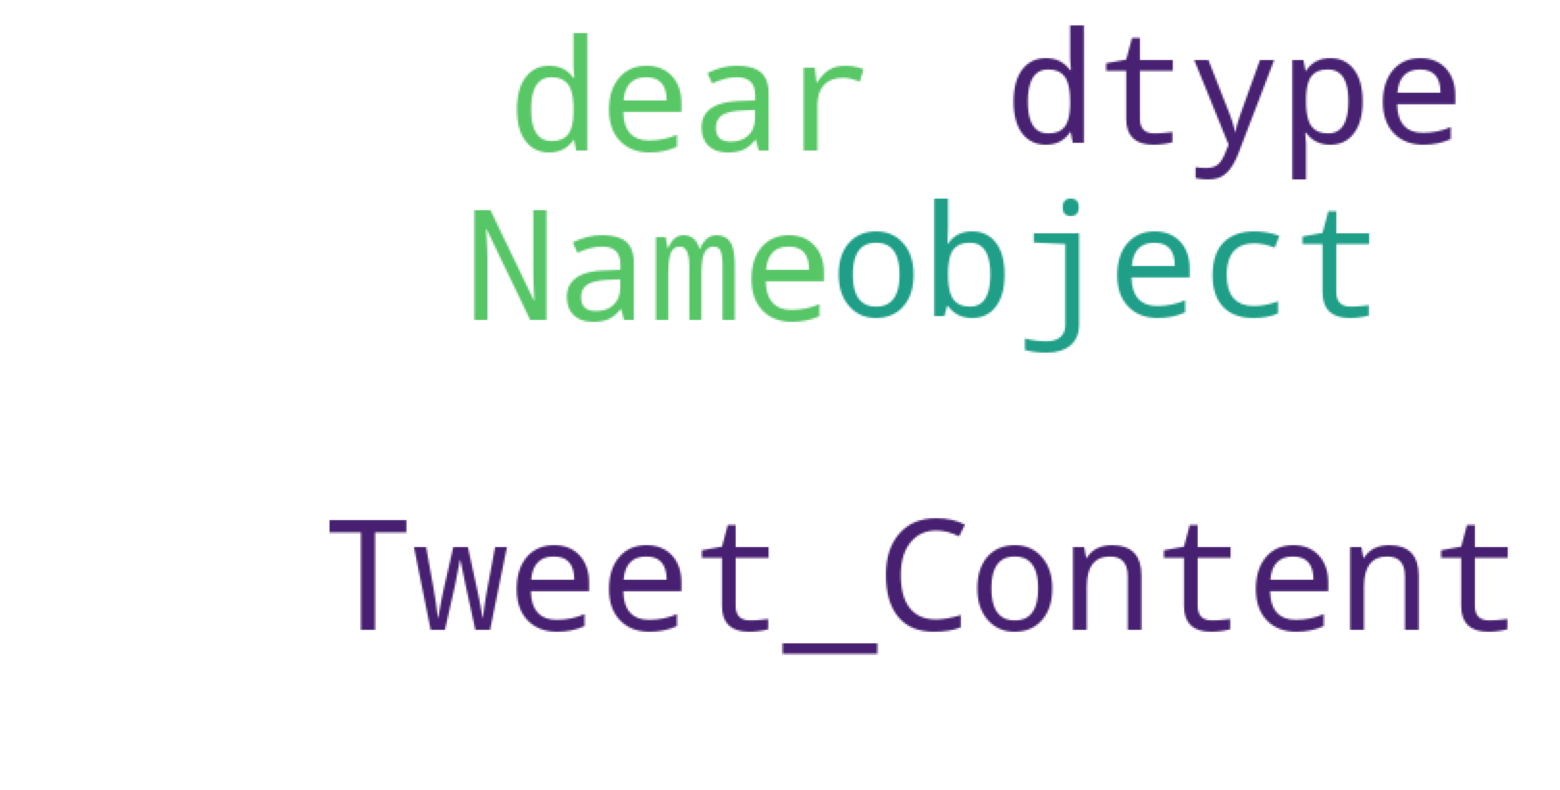

In [158]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(tweet_neg['Tweet_Content']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


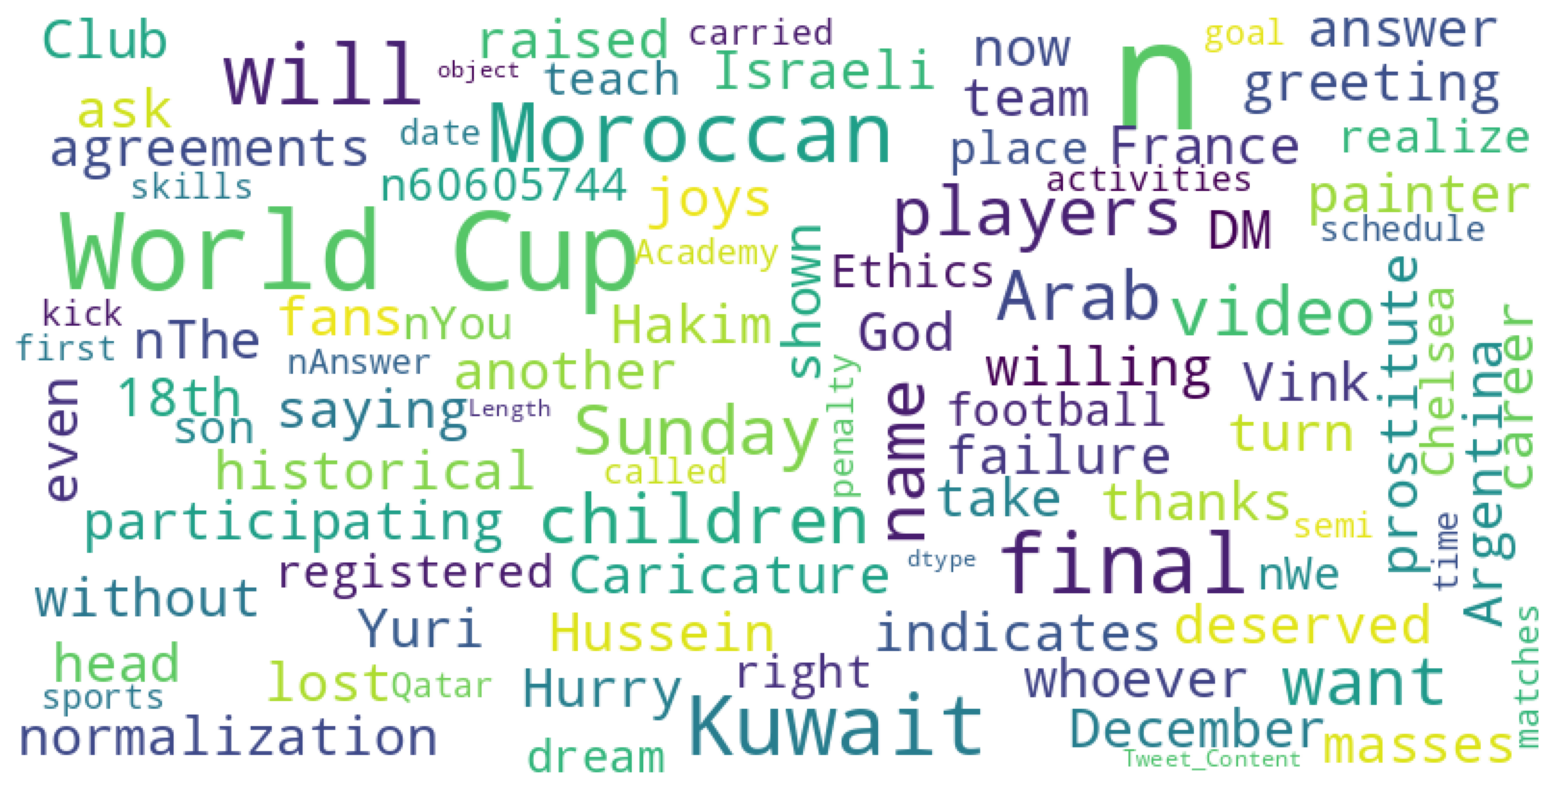

In [159]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(tweet_net['Tweet_Content']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

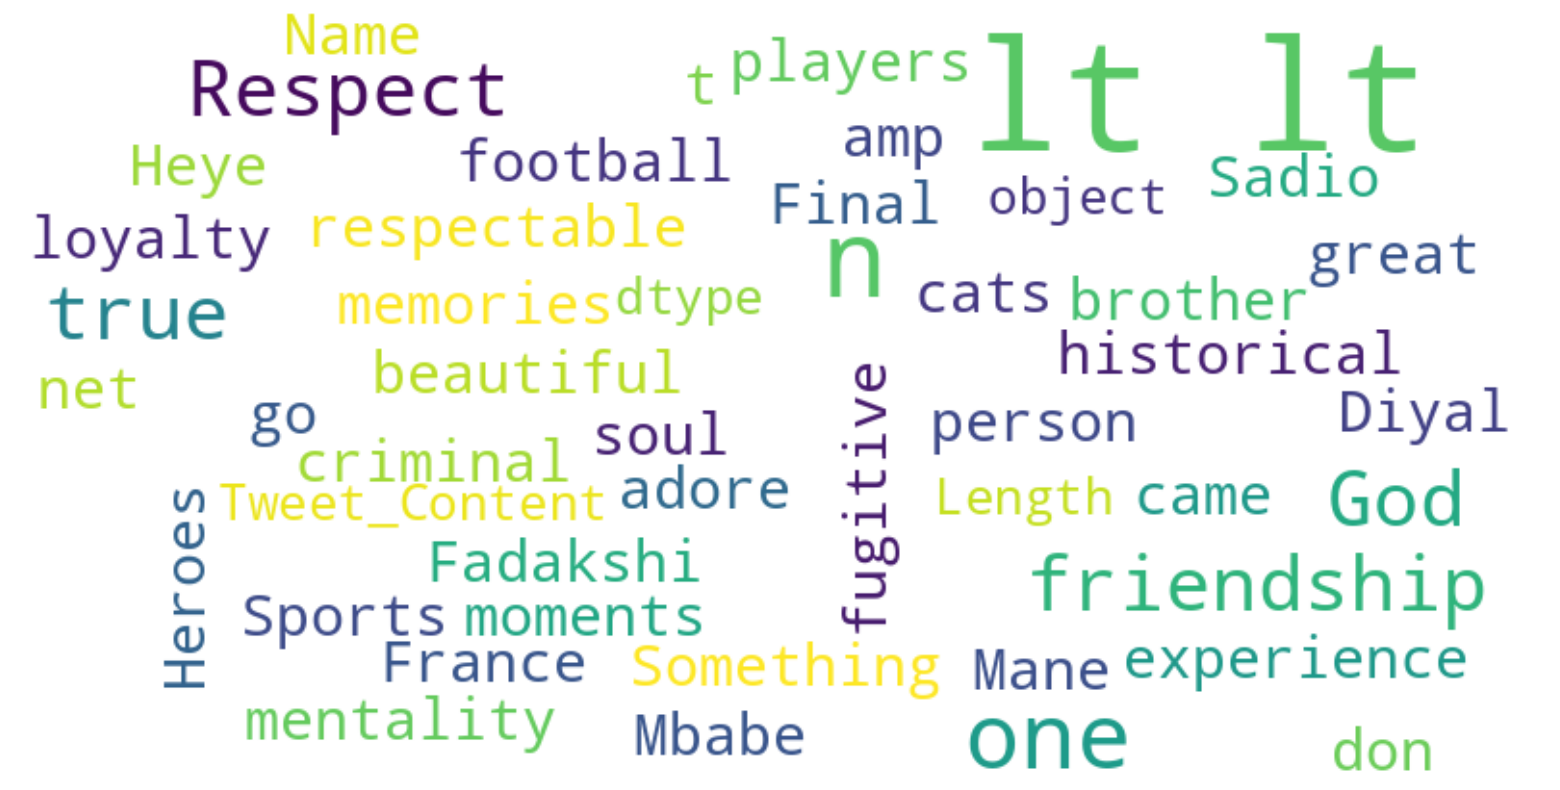

In [160]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(tweet_pos['Tweet_Content']))

print(wordcloud)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [161]:
dataset = tweet_df[['Sentiment','Tweet_Content']]
text, sentiment = list(dataset['Tweet_Content']), list(dataset['Sentiment'])

In [163]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [164]:
def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')

        processedText.append(tweetwords)

    return processedText

In [165]:
import time
import nltk
nltk.download('wordnet')
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

[nltk_data] Downloading package wordnet to /root/nltk_data...


Text Preprocessing complete.
Time Taken: 4 seconds


In [166]:
#Spltting the Dataframe
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')


Data Split done.


In [167]:
#vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
#vectoriser.fit(X_train)
#print(f'Vectoriser fitted.')
#print('No. of feature_words: ', len(vectoriser.get_feature_names()))

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
model1 = vectorizer.fit(X_train)
print('Vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))


Vectorizer fitted.
No. of feature_words:  10015


In [168]:
print(model1)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))


In [170]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [171]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
ys_predict = BNBmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

     neutral       0.99      1.00      0.99        89
    positive       0.00      0.00      0.00         1

    accuracy                           0.99        90
   macro avg       0.49      0.50      0.50        90
weighted avg       0.98      0.99      0.98        90

Confusion Matrix: 
 [[89  0]
 [ 1  0]]
Accuracy Score: 
 0.9888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X_train, y_train)
ys_predict = KNNModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

     neutral       0.99      1.00      0.99        89
    positive       0.00      0.00      0.00         1

    accuracy                           0.99        90
   macro avg       0.49      0.50      0.50        90
weighted avg       0.98      0.99      0.98        90

Confusion Matrix: 
 [[89  0]
 [ 1  0]]
Accuracy Score: 
 0.9888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
DTCModel = DecisionTreeClassifier(random_state=0)
DTCModel.fit(X_train, y_train)
ys_predict = DTCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

     neutral       0.99      1.00      0.99        89
    positive       0.00      0.00      0.00         1

    accuracy                           0.99        90
   macro avg       0.49      0.50      0.50        90
weighted avg       0.98      0.99      0.98        90

Confusion Matrix: 
 [[89  0]
 [ 1  0]]
Accuracy Score: 
 0.9888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:
RFCModel = RandomForestClassifier(n_estimators=100)
RFCModel.fit(X_train, y_train)
ys_predict = RFCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

     neutral       0.99      1.00      0.99        89
    positive       0.00      0.00      0.00         1

    accuracy                           0.99        90
   macro avg       0.49      0.50      0.50        90
weighted avg       0.98      0.99      0.98        90

Confusion Matrix: 
 [[89  0]
 [ 1  0]]
Accuracy Score: 
 0.9888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
ys_predict = LRmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

     neutral       0.99      1.00      0.99        89
    positive       0.00      0.00      0.00         1

    accuracy                           0.99        90
   macro avg       0.49      0.50      0.50        90
weighted avg       0.98      0.99      0.98        90

Confusion Matrix: 
 [[89  0]
 [ 1  0]]
Accuracy Score: 
 0.9888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
ys_predict = SVCmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

     neutral       0.99      1.00      0.99        89
    positive       0.00      0.00      0.00         1

    accuracy                           0.99        90
   macro avg       0.49      0.50      0.50        90
weighted avg       0.98      0.99      0.98        90

Confusion Matrix: 
 [[89  0]
 [ 1  0]]
Accuracy Score: 
 0.9888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
import torch
from scipy.special import softmax
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from textblob import TextBlob
import numpy as np

def analyze_sentiment_and_status(text):
    # Preprocess the input text
    def preprocess(text):
        new_text = []
        for t in text.split(" "):
            t = '@user' if t.startswith('@') and len(t) > 1 else t
            t = 'http' if t.startswith('http') else t
            new_text.append(t)
        return " ".join(new_text)

    # Load the sentiment analysis model
    sentiment_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
    sentiment_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment").to(device)

    # Load the emotion analysis model
    emotion_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
    emotion_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion").to(device)

    # Preprocess the input text
    preprocessed_text = preprocess(text)

    # Sentiment Analysis
    with torch.no_grad():
        encoded_input = sentiment_tokenizer(preprocessed_text, return_tensors='pt', padding=True, truncation=True).to(device)
        output = sentiment_model(**encoded_input)
        sentiment_scores = softmax(output[0].detach().cpu().numpy(), axis=1)

    # Emotion Analysis
    with torch.no_grad():
        encoded_input = emotion_tokenizer(preprocessed_text, return_tensors='pt', padding=True, truncation=True).to(device)
        output = emotion_model(**encoded_input)
        emotion_scores = softmax(output[0].detach().cpu().numpy(), axis=1)

    # TextBlob Sentiment Analysis
    textblob_sentiment = TextBlob(preprocessed_text).sentiment.polarity

    # Determine overall sentiment
    overall_sentiment = np.argmax(sentiment_scores)

    # Map sentiment labels
    sentiment_labels = ['negative', 'neutral', 'positive']
    overall_sentiment_label = sentiment_labels[overall_sentiment]

    # Determine emotion
    emotion = np.argmax(emotion_scores)

    # Map emotion labels
    emotion_labels = ['anger', 'joy', 'optimism', 'sadness']
    emotion_label = emotion_labels[emotion]

    return {
        'textblob_sentiment': textblob_sentiment,
        'overall_sentiment': overall_sentiment_label,
        'sentiment_scores': sentiment_scores.tolist(),
        'emotion': emotion_label,
        'emotion_scores': emotion_scores.tolist()
    }

In [179]:
# Example usage
input_text = "weather is so great"
result = analyze_sentiment_and_status(input_text)
print(result)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'textblob_sentiment': 0.8, 'overall_sentiment': 'positive', 'sentiment_scores': [[0.0019358257995918393, 0.010041404515504837, 0.9880228042602539]], 'emotion': 'joy', 'emotion_scores': [[0.013805119320750237, 0.9423027634620667, 0.03206746652722359, 0.011824699118733406]]}
